<img src="https://www.mines.edu/webcentral/wp-content/uploads/sites/267/2019/02/horizontallightbackground.jpg" width="100%"> 

### CSCI250 Python Computing: Building a Sensor System
<hr style="height:5px" width="100%" align="left">

# LAB: Seismometer 
## Sam Burton

# Introduction

The goal for this lab is to create a [seismometer](https://en.wikipedia.org/wiki/Seismometer) using a variety of **motion sensors**.

<img src="https://www.dropbox.com/s/u628vjn2uc5h3ua/notebook.png?raw=1" width="10%" align="right">

Read through
* the [tilt switch notebook](h_TiltSwitch.ipynb) to learn about a simple device indicating position;
* the [piezo element notebook](h_PiezoElement.ipynb) to learn about a device measuring deformation;
* the [accelerometer notebook](h_Accelerometer.ipynb) to learn about a device measuring acceleration.

**Build the circuits in all notebooks to ensure that everything works correctly.**

# Pre-lab questions

### Tilt Switch

1. In what orientations does the switch open/close?
    * The switch is closed when the ball is connected to the pins, i.e. when the switch is not upright. Otherwise the switch is open/pulled up.
2. What can you do if you don't like having the switch attached to the breadboard?
    * You can attach the switch to M/F wires so it is more easily rotated.
3. What is the purpose of the pull-up/pull-down resistors?
    * They ensure the signal will have either known high voltage or known low voltage instead of an undefined voltage between them. It is not ideal to leave the circuit in a floating state, so the resistors compensate accordingly.

### Piezo element

1. Briefly describe the piezoelectric effect.
    * Electric charge accumulates in some materials in response to mechanical stress due to pressure and latent heat. The charge is measurable and reversible, as materials also can deform in response to applied electric field.
2. Why might the 1M Ohm resistor be important?
    * the Piezo element cannot store very much electric charge (it has small capacitance), so undesirable charge can build up in them. The resistor manages this problem for it.
3. What is the largest voltage you could measure from the piezo element in testing?
    * 3.3 Volts

### Accelerometer

1. What accelerations do you measure when the sensor is placed flat?
    * ax,ay,az = -0.97716796875 -0.316142578125 9.79083984375
2. How would you calculate the total magnitude of acceleration? (Hint: there's a useful theorem for this!)
    * magnitude = sqrt(ax^2 + ay^2 + az^2)
3. What is the maximum acceleration that you can measure in each direction? (Try it! But don't break anything.)
    * When the accelerometer is stationary it measures around 9.81 m/s^2 as the maximum, but this can be higher if the accelerometer is moving.

# General Directions

Your goal is to create a simple seismometer using several motion sensors. 

The basic idea for this lab is as follows: 

* The code should wait until large seismic activity is detected (ie. wait until the tilt switch flips over). 
* Then collect lots of data from the piezo element and from the accelerometer to record and display the earthquake behavior. 
* After data are collected, store the data in a file, and plot the raw data vs. time.

## Specific Requirements

* Create classes for the accelerometer and piezo element as described below
    * Create one instance of each for use later

* Create a loop that waits for the tilt switch to flip over

* Then record sensor data from the accelerometer and piezo element:
    * record data from the sensors for 5s - don't use `time.sleep()`
    * record the corresponding time of each measurement
    * synchronize the measurements (i.e. use the same relative time)
    
* Once data collection finishes, save all data:
    * store all arrays, including the time, into a single `.npz` file.
    
* Create plots of your data vs. time:
    * plot all accelerometer components on a single plot;
    * plot the data from the piezo element separately.

### Object-oriented programming
Your code should be built using an object-oriented framework

<img src="https://www.dropbox.com/s/u628vjn2uc5h3ua/notebook.png?raw=1" width="10%" align="right">

See the [OOP basics](s_PyOOPbasics.ipynb) for basics of OOP programming.

See the [OOP extensions](s_PyOOPextensions.ipynb) for advanced concepts of OOP programming.

## class `Accelerometer`

Required methods:
* `__init__(tref=0)`
    * set instance variable `tref` 
        * if the constructor argument is not 0, set `self.tref=tref`
        * otherwise, set `self.tref` to the current time
    * initializes 4 `numpy` arrays for time and the 3 acceleration components
        * set all the array sizes to 0
        * set all the array values to 0

* `getTref()`
    * returns the reference time `tref`
* `setTref(tref)`
    * set the time reference to `tref`

* `read()`
    * reads one sample (ax,ay,az) from the accelerometer with `accUtil.py`
    * appends the relative time to `tref` to the declared `numpy` array
    * appends the acceleration components to the declared `numpy` arrays
        
* `save(name=None)`
    * saves the time and accelerometer data to an `.npz` file
        
* `plot()`
    * create and display a single plot of the acceleration data as a function of time
    * add labels, legend, etc.

## class Piezoelement

Required methods:
* `__init__(tref=0, chan=0)`
    * set instance variable `tref` 
        * if the constructor argument is not 0, set `self.tref=tref`
        * otherwise, set `self.tref` to the current time
    * set the instance variable `chan`
    * initializes 2 `numpy` arrays for time and the piezoelement data
        * set all the array sizes to 0
        * set all the array values to 0

* `getTref()`
    * returns the reference time `tref`       
* `setTref(tref)`
    * set the time reference to `tref`
    
* `read()`
    * reads one sample from the piezoelment with `adcUtil.py`
    * appends the relative time to `tref` to the declared `numpy` array
    * appends the piezoelement data to the declared `numpy` array
    
* `save(name=None)`
    * saves the time and piezoelement data to an `.npz` file
    
* `plot()`
    * create and display a single plot of the piezoelement data as a function of time
    * add labels, legend, etc.

* Add methods to your **Accelerometer** and **Piezoelement** classes that modify the data or the behavior of the sensors.

# Your code

No starter code is provided for this lab. Use comments throughout your code so we can understand what it does. Even if you can't figure out how to write the code for something, a comment explaining what you wanted will get partial credit.

In [1]:
# Your code here

import time
import matplotlib.pyplot as plt
import numpy as np
import accUtil as acc
import RPi.GPIO as GPIO
import adcUtil as adc

In [2]:
class Accel:
    """This is the accelerometer class. The following libraries must be imported:
        - time
        - matplotlib.pyplot as plt
        - accUtil as acc
        - numpy as np
    """
    

    
    def __init__(self, tref=0):
        if tref==0:
            self.tref=tref
        else:
            tref = time.time()
        
        self.times = []
        self.dataX = []
        self.dataY = []
        self.dataZ = []
    
    def getTref(self):
        return self.tref
    
    def setTref(self, newTref):
        self.tref = newTref
        
    def read(self):
        #reads one sample from the accelerometer
        ax,ay,az = acc.readACC("MMA8452Q")
        #saves data to data arrays
        self.times.append(time.time()-self.tref)
        self.dataX.append(ax)
        self.dataY.append(ay)
        self.dataZ.append(az)
    
    def save(self, name=None):
        #saves data arrays to files
        if name==None:
            np.savez("acc_"+str(self.tref)+".npz", time=self.times, accX=self.dataX, accY=self.dataY, accZ=self.dataZ)
        else:
            np.savez(name, time=self.times, accX=self.dataX, accY=self.dataY, accZ=self.dataZ)

    def plot(self):
        plt.plot(self.times, self.dataX, label="Acceleration in X direction")
        plt.plot(self.times, self.dataY, label="Acceleration in Y direction")
        plt.plot(self.times, self.dataZ, label="Acceleration in Z direction")
        plt.title("Acceleration as a function of time")
        plt.xlabel("Time")
        plt.ylabel("Acceleration (m/s^2)")
        plt.legend()

    def reset(self):
        self.times = []
        self.dataX = []
        self.dataY = []
        self.dataZ = []
        

In [3]:
class Piezo:
    """This is the piezoelement class. In order to use the following libraries must be imported:
        -matplotlib.pyplot as plt
        -numpy as np
        -adcUtil as adc
        -time
        """
    
    def __init__(self, tref=0, chan=0):
        if tref==0:
            self.tref = time.time()
        else:
            self.tref = tref
        
        if chan==0:
            self.chan = 0
        else:
            self.chan = chan
        
        self.times = []
        self.data = []
    
    def getTref(self):
        return self.tref
    
    def setTref(self, newTref):
        self.tref = newTref
        
    def read(self):
        reading = adc.readADC(channel=self.chan)
        self.times.append(time.time()-self.tref)
        self.data.append(reading)
        
    def save(self, name=None):
         #saves data arrays to files
        if name==None:
            np.savez("pezo_"+str(self.tref)+".npz", time=self.times, voltage=self.data)
        else:
            np.savez(name, time=self.times, voltage=self.data)

    def plot(self):
        plt.plot(self.times, self.data, label="Piezoelement")
        plt.title("Voltage as a function of time")
        plt.xlabel("Time")
        plt.ylabel("Voltage (V)")
        plt.legend()

    def reset(self):
        self.times = []
        self.data = []

In [4]:
# Your code here
#Create classes for the accelerometer and piezo element as described below
####################### see above


#Create one instance of each for use later

myAccel = Accel(tref=0)

myPiez = Piezo(tref=0, chan=0)

In [5]:
#Create a loop that waits for the tilt switch to flip over

 ####first, set up the tilt switch

GPIO.setmode(GPIO.BCM)

switchPin = 25 ################################## set the tilt switch GPIO pin here!!!!!!!!!!!

####################################### I connect the other pin on the switch to 3.3V
GPIO.setup(switchPin, GPIO.IN, pull_up_down=GPIO.PUD_DOWN)
GPIO.setup(switchPin, GPIO.IN, pull_up_down=GPIO.PUD_DOWN)

#make a function that saves a little bit of typing later on
def tilt():
    GPIO.setup(switchPin, GPIO.IN, pull_up_down=GPIO.PUD_DOWN)
    GPIO.setup(switchPin, GPIO.IN, pull_up_down=GPIO.PUD_DOWN)
    return GPIO.input(switchPin)

In [6]:
#### now I get to the loop

running = True
times = []

while running == True:

    if tilt() == 0:
    #synchronize the measurements (i.e. use the same relative time)
        now = time.time()
        myAccel.setTref(now)
        myPiez.setTref(now)
        
        #record data from the sensors for 5s - don't use time.sleep()
        start = time.time()
        while time.time() <= 5+start:
            #record the corresponding time of each measurement
            times.append(time.time())
    
            #Then record sensor data from the accelerometer and piezo element:
            myAccel.read()
            myPiez.read()
        running=False

In [7]:
#Once data collection finishes, save all data:
myAccel.save(name="myAccelData.npz")
myPiez.save(name="myPiezData.npz")
    
#store all arrays, including the time, into a single .npz file.
np.savez("earthquakeData.npz", time=myAccel.times, accX=myAccel.dataX, accY=myAccel.dataY, accZ=myAccel.dataZ, voltage=myPiez.data)
   

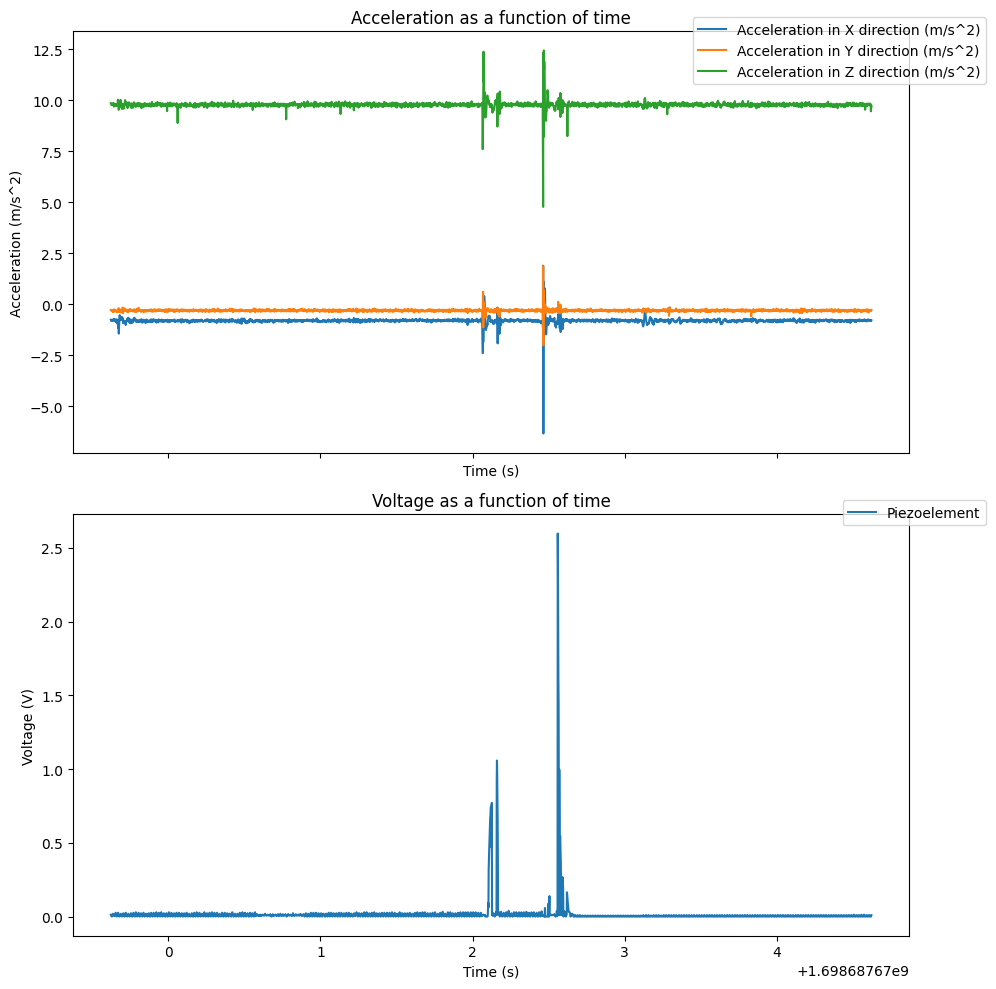

In [13]:
 
#Create plots of your data vs. time:
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(10, 10))

#plot all accelerometer components on a single plot;
ax1.plot(times, myAccel.dataX, label="Acceleration in X direction (m/s^2)")
ax1.plot(times, myAccel.dataY, label="Acceleration in Y direction (m/s^2)")
ax1.plot(times, myAccel.dataZ, label="Acceleration in Z direction (m/s^2)")


ax1.legend(bbox_to_anchor=(1.1, 1.05))
ax1.set_ylabel("Acceleration (m/s^2)")
ax1.set_xlabel("Time (s)")
ax1.set_title("Acceleration as a function of time")

#plot the data from the piezo element separately.
ax2.plot(times, myPiez.data, label="Piezoelement")
ax2.set_ylabel("Voltage (V)")
ax2.set_xlabel("Time (s)")
ax2.set_title("Voltage as a function of time")
ax2.legend(bbox_to_anchor=(1.1, 1.05))

plt.tight_layout()

In [ ]:
myAccel.reset()
myPiez.reset()

########################## Each of these cells can only be run once for the code to run properly. I asked if this was okay and Eric said it is fine.

# Post lab

<img src="http://www.dropbox.com/s/fcucolyuzdjl80k/todo.jpg?raw=1" width="10%" align="right">

Before you submit the lab, make sure everything works as you expect by restarting the kernel: select **Kernel > Restart & Run All**.

Answer the following questions.

1. What elements of this lab did you find easy/challenging?
    * I was going to drive to campus to complete this lab on Sunday, but the road conditions were not good so I had to code the entire lab without testing it on the Pi. I was worried about it, but it was fine. The errors were easy to fix once I had a chance to test it.
2. What did you like/dislike about this lab?
    * I like that we coded a seismometer. Because I am in Geophysics and that sort of thing is exciting in Geophysics.
3. If you did anything worthy of extra credit, tell us about it here!
    * I did only what was asked of me.

# Submit
* Make sure to update your name and department in the top markdown cell.

* Rename the Jupyter notebook with the following convention:
**HL?-FirstLast.ipynb** (replace ? with the lab number)

* Turn in your Jupyter notebook on Canvas. Email submissions don't count.

* Include pictures of all the circuits you made.

![Seismometer Hardware](seismometer_hardware.jpg)

# Honor code
Unless explicitly specified, labs are **individual exercises**. Your submission is subject to the [**Mines Honor Code**](http://inside.mines.edu/~epoeter/_GW/CSMHonorCodeUndergradHandbook.pdf).